In [1]:
import pyorc
import numpy as np
import pandas as pd
import xarray as xr
from Radar import Radar
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.colors import Normalize

In [2]:
df = pd.read_csv("RSS_Data_October21.txt")[[
    'TIMESTAMP', 'Average_velocity', 'Tilt_angle_value'
]]
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.Average_velocity = df.Average_velocity / 1000
df

TIMESTAMP  Average_velocity  Tilt_angle_value
0   2024-09-12 13:00:00             0.943                43
1   2024-09-12 14:00:00             0.995                44
2   2024-09-12 15:00:00             0.956                44
3   2024-09-12 16:00:00             0.953                44
4   2024-09-12 17:00:00             0.884                43
..                  ...               ...               ...
931 2024-10-21 08:00:00             0.942                43
932 2024-10-21 09:00:00             0.911                43
933 2024-10-21 10:00:00             0.965                43
934 2024-10-21 11:00:00             1.151                43
935 2024-10-21 12:00:00             0.963                43

[936 rows x 3 columns]

In [3]:
cam = pd.read_csv("Results/video_capture_2024-09-12_12-00-04_radar_results.csv")[[
    'time', 'y', 'x', 'v_x', 'v_y', 's2n', 'corr', 'xp', 'yp', 'xs', 'ys'    
]]
cam['velocity'] = np.sqrt(cam.v_x**2 + cam.v_y**2)
cam['datetime'] = dt(2024, 9, 12, 13, 0, 0)
cam

time      y      x  v_x  v_y  s2n  corr         xp          yp  \
0       0.066667  6.145  0.125  NaN  NaN  NaN   NaN  1856.7018   20.097534   
1       0.066667  6.145  0.255  NaN  NaN  NaN   NaN  1843.4915   58.721924   
2       0.066667  6.145  0.385  NaN  NaN  NaN   NaN  1830.9132   95.498410   
3       0.066667  6.145  0.515  NaN  NaN  NaN   NaN  1818.9227  130.556400   
4       0.066667  6.145  0.645  NaN  NaN  NaN   NaN  1807.4797  164.013550   
...          ...    ...    ...  ...  ...  ...   ...        ...         ...   
119245  8.333333  3.935  6.365  NaN  NaN  NaN   NaN  1181.5319  866.075440   
119246  8.333333  3.935  6.495  NaN  NaN  NaN   NaN  1183.0547  874.238160   
119247  8.333333  3.935  6.625  NaN  NaN  NaN   NaN  1184.5438  882.220340   
119248  8.333333  3.935  6.755  NaN  NaN  NaN   NaN  1186.0004  890.027950   
119249  8.333333  3.935  6.885  NaN  NaN  NaN   NaN  1187.4254  897.666560   

               xs        ys  velocity            datetime  
0        9.027056  1.897217       NaN 2024-09-12 13:00:00  
1        9.019509  2.026998       NaN 2024-09-12 13:00:00  
2        9.011962  2.156778       NaN 2024-09-12 13:00:00  
3        9.004415  2.286559       NaN 2024-09-12 13:00:00  
4        8.996868  2.416340       NaN 2024-09-12 13:00:00  
...           ...       ...       ...                 ...  
119245  10.871069  8.254993       NaN 2024-09-12 13:00:00  
119246  10.863521  8.384774       NaN 2024-09-12 13:00:00  
119247  10.855974  8.514555       NaN 2024-09-12 13:00:00  
119248  10.848427  8.644335       NaN 2024-09-12 13:00:00  
119249  10.840880  8.774116       NaN 2024-09-12 13:00:00  

[119250 rows x 13 columns]

In [4]:
df[df.TIMESTAMP == cam.datetime[0]].Average_velocity[0]

0.943

In [5]:
np.average(cam.velocity.dropna())

0.45772134002299625

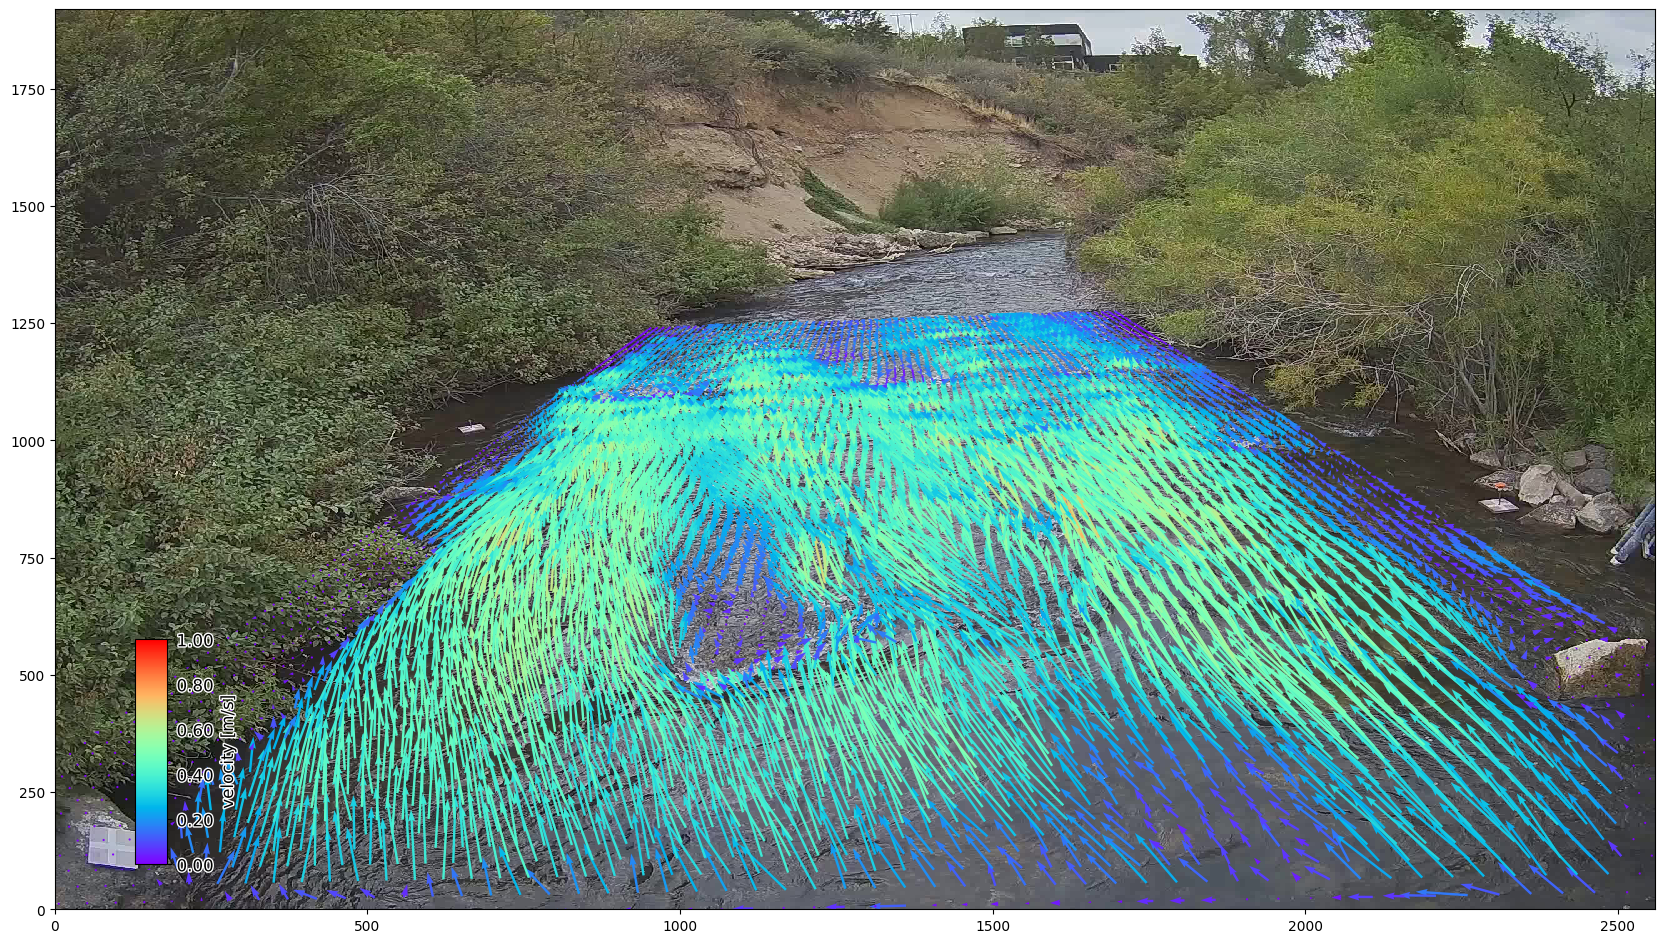

In [6]:
ds = xr.open_dataset("Results/video_capture_2024-09-12_12-00-04_radar_results.nc")
video = pyorc.Video("Videos/video_capture_2024-09-12_12-00-04.mp4", start_frame=0, end_frame=125)
video.camera_config = pyorc.load_camera_config("NEW_cam-config-UWRL.json") # ds.velocimetry.camera_config
radar = Radar()

ds_new = ds.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=1,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()

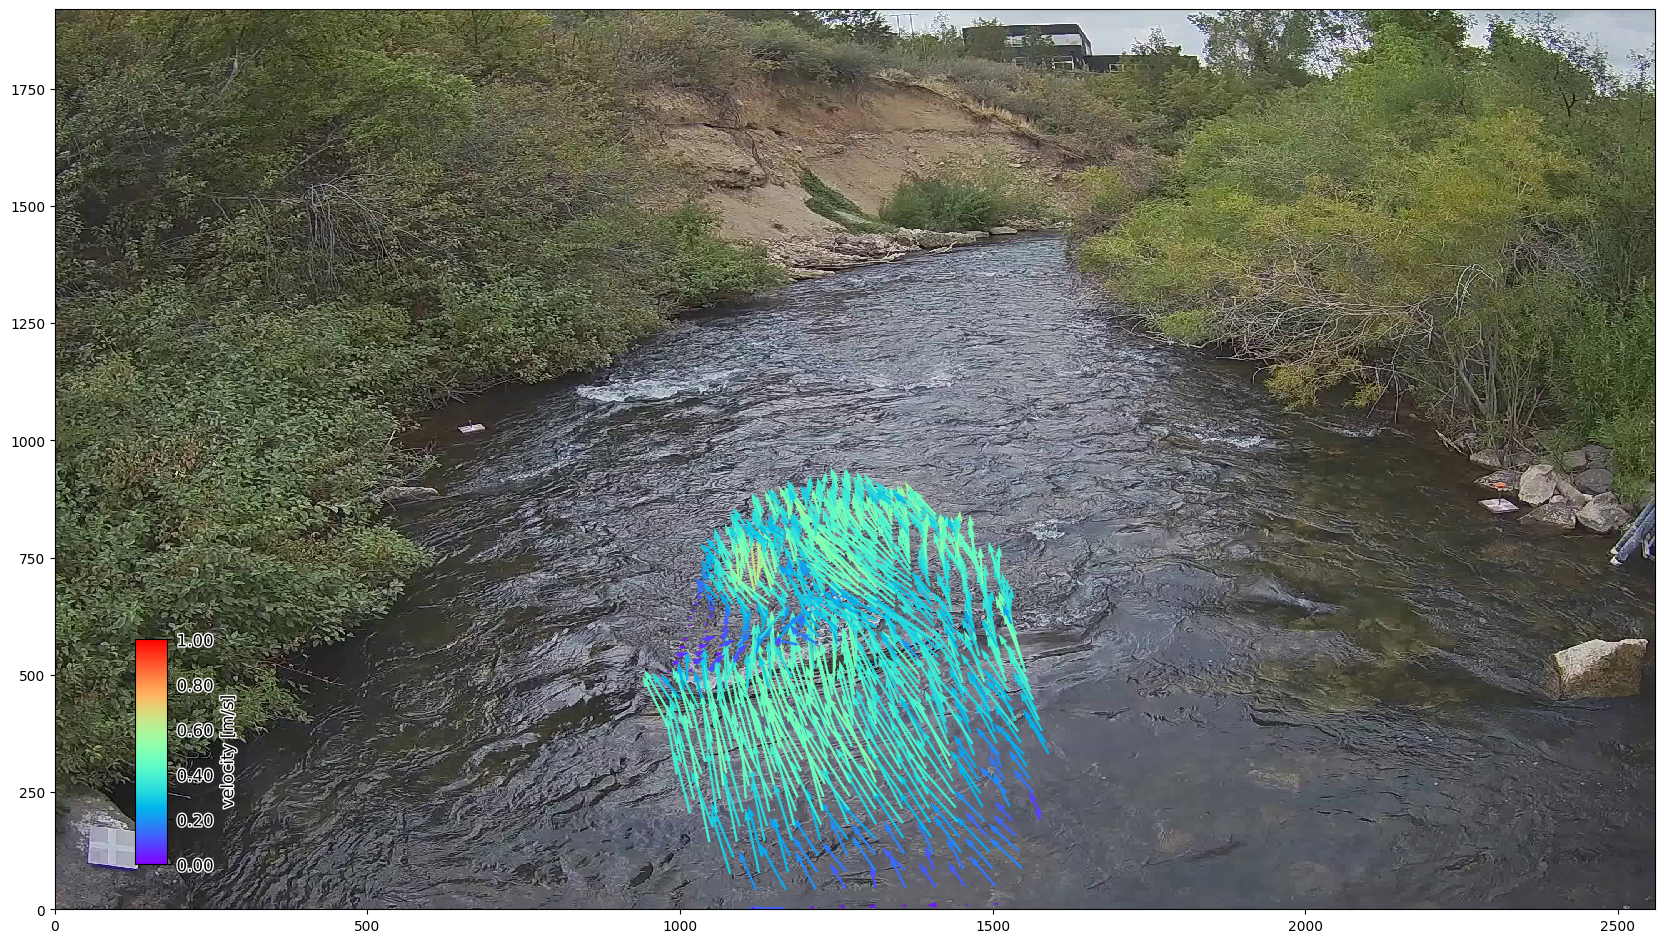

In [7]:
ds = xr.open_dataset("Results/test.nc")
video = pyorc.Video("Videos/video_capture_2024-09-12_12-00-04.mp4", start_frame=0, end_frame=125)
video.camera_config = pyorc.load_camera_config("NEW_cam-config-UWRL.json") # ds.velocimetry.camera_config
radar = Radar()

ds_new = ds.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=1,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()